In [6]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import talib as tl
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
filename = 'USDCLP.xlsx'
data = pd.read_excel(filename, skiprows=4, index_col='Dates', parse_dates=True)
data.dropna(inplace=True)
data.head()

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST
Dates,,,,
1990-01-02,297.37,297.37,297.37,297.37
1990-01-03,297.37,297.37,297.37,297.37
1990-01-04,297.37,297.37,297.37,297.37
1990-01-05,297.37,297.37,297.37,297.37
1990-01-08,297.37,297.37,297.37,297.37


In [9]:
train_size = 500
test_size = 100
full_size = train_size + test_size
return_day = 20

# rolling_std_dev_size = 40
extreme_multiplier = 4

In [10]:
oopen = data['PX_OPEN'].values
high = data['PX_HIGH'].values
low = data['PX_LOW'].values
close = data['PX_LAST'].values

In [11]:
features_to_delete = data.columns.tolist()

# ROC

In [12]:
for i in [2, 5, 10, 20, 30]:
    data[f'ROC {i}'] = tl.ROC(close, timeperiod=i)

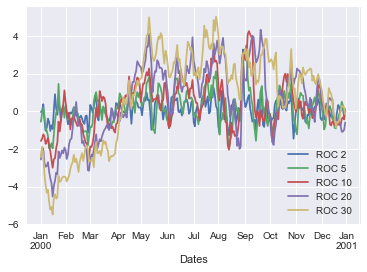

In [14]:
data['2000-01': '2000-12'][['ROC 2', 'ROC 5', 'ROC 10', 'ROC 20', 'ROC 30']].plot()

# Deviation from zero-lag exponential MA

In [21]:
for i in [10, 20, 40]:
    lag = (i-1)/2
    ema_data = 2*data['PX_LAST'] - data['PX_LAST'].shift(i).fillna(method='bfill')
    data['Deviation EMA ' + str(i)] = data['PX_LAST'] - tl.EMA(ema_data.values, timeperiod=i)

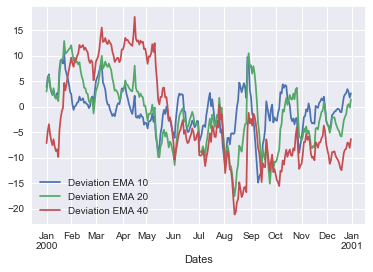

In [23]:
data['2000'][['Deviation EMA 10', 'Deviation EMA 20', 'Deviation EMA 40']].plot()

# MACD

In [26]:
aa = 'hello'

In [28]:
str(14) + ', ' + str(20) + ', '

'14, 20, '

In [27]:
f'{aa} world'

'hello world'

In [24]:
for i, j, k in [(14, 20, 12), (12, 16, 9), (3, 5, 2)]:
    macd, macdsignal, macdhist = tl.MACD(close, fastperiod=i, slowperiod=j, signalperiod=k)
    data[f'MACD ({i}, {j}, {k})'] = macd

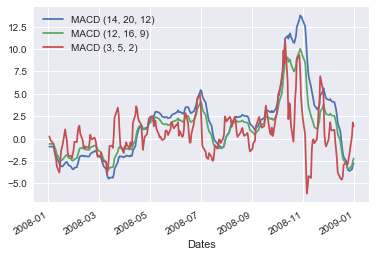

In [25]:
data['2008'][['MACD (14, 20, 12)', 'MACD (12, 16, 9)', 'MACD (3, 5, 2)']].plot()

# RSI

In [29]:
for i in [5, 10, 14, 20]:
    data[f'RSI {i}'] = tl.RSI(close, timeperiod=i)

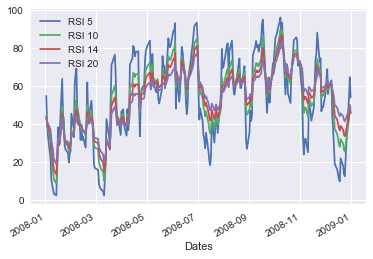

In [30]:
data['2008'][['RSI 5', 'RSI 10', 'RSI 14', 'RSI 20']].plot()

# SMA differences

In [31]:
for i, j in [(5, 10), (10, 20), (20, 40)]:
    data[f'SMA ({i}, {j}) diff'] = tl.SMA(close, timeperiod=i) - tl.SMA(close, timeperiod=j)

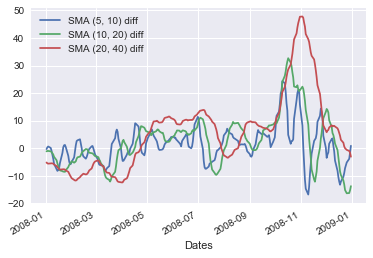

In [32]:
data['2008'][['SMA (5, 10) diff', 'SMA (10, 20) diff', 'SMA (20, 40) diff']].plot()

# ADX: Average directional index

In [33]:
data['ADX 20'] = tl.ADX(high, low, close, timeperiod=20)
data['ADX 14'] = tl.ADX(high, low, close, timeperiod=14)
data['ADX 7'] = tl.ADX(high, low, close, timeperiod=7)

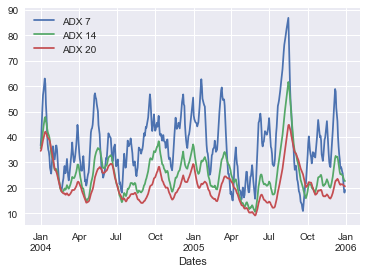

In [38]:
data['2004':'2005'][['ADX 7', 'ADX 14', 'ADX 20']].plot()

# CCI: Commodity Channel Index

In [39]:
data['CCI 14'] = tl.CCI(high, low, close, timeperiod=14)

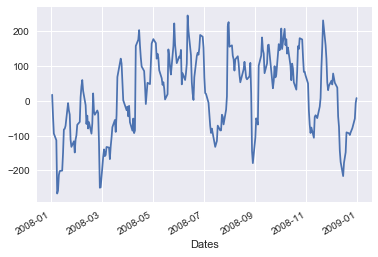

In [40]:
data['2008']['CCI 14'].plot()

# STD deviation 20 = Bollinger Bands (20)

In [41]:
data['Std dev 10'] = tl.STDDEV(close, timeperiod=10)
data['Std dev 20'] = tl.STDDEV(close, timeperiod=20)

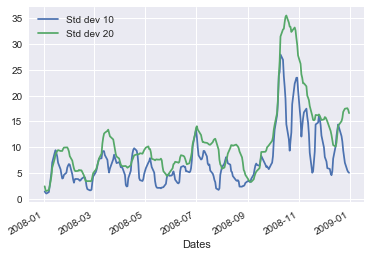

In [42]:
data['2008'][['Std dev 10', 'Std dev 20']].plot()

# Y target value

In [43]:
data['Return'] = data['PX_LAST'].pct_change(return_day).shift(-return_day)*100
data['Return scaled'] = data['Return'] / (data['Return'].rolling(return_day).std().fillna(1.0))

In [44]:
data.dropna(inplace=True)
data.drop(labels=features_to_delete, inplace=True, axis=1)
data.head()

,ROC 2,ROC 5,ROC 10,ROC 20,ROC 30,Deviation EMA 10,Deviation EMA 20,Deviation EMA 40,"MACD (14, 20, 12)","MACD (12, 16, 9)",...,"SMA (10, 20) diff","SMA (20, 40) diff",ADX 20,ADX 14,ADX 7,CCI 14,Std dev 10,Std dev 20,Return,Return scaled
Dates,,,,,,,,,,,,,,,,,,,,,
1990-02-26,0.000000,0.000000,0.000000,-0.601944,-0.601944,0.215031,1.255393,-0.089500,-0.149260,-0.091096,...,-0.0895,-0.85025,95.000000,79.452745,94.654221,0.000000,0.000000,0.390121,-0.135327,-1.296999
1990-02-27,0.000000,0.000000,0.000000,-0.601944,-0.601944,0.175935,1.306308,0.002183,-0.139542,-0.083090,...,0.0000,-0.89500,95.250000,80.920406,95.417904,0.000000,0.000000,0.000000,-0.135327,-inf
1990-02-28,-0.135327,-0.135327,-0.135327,-0.135327,-0.736456,-0.110599,0.858088,-0.271582,-0.145387,-0.090088,...,-0.0200,-0.86025,95.487500,82.283234,96.072489,-466.666667,0.120000,0.087178,0.000000,0.000000
1990-03-01,-0.135327,-0.135327,-0.135327,-0.135327,-0.736456,-0.017763,0.814461,-0.151505,-0.148125,-0.093682,...,-0.0400,-0.82550,95.713125,83.548718,96.633562,-233.333333,0.160000,0.120000,0.000000,0.000000
1990-03-02,0.000000,-0.135327,-0.135327,-0.135327,-0.736456,0.058194,0.774988,-0.037285,-0.148391,-0.094670,...,-0.0600,-0.79075,95.927469,84.723809,97.114482,-155.555556,0.183303,0.142829,0.609797,3.616314


# Features

In [45]:
feature_names = data.drop(['Return', 'Return scaled'], axis=1).columns

# Train and test Random Forest

In [46]:
def to_class(y_vec):
#     y_extreme = extreme_multiplier * y_vec.rolling(rolling_std_dev_size).std().fillna(method='bfill')
    
    pos = y_vec > extreme_multiplier
    neg = y_vec < -1*extreme_multiplier

    y_vec[:] = 'Neutral'
    y_vec[pos] = 'Pos'
    y_vec[neg] = 'Neg'
    return y_vec

In [47]:
def make_X_y(df):
    X = df.drop(['Return', 'Return scaled'], axis=1)
    y = df['Return'].copy()
    ret = y.copy()
    y = to_class(y)
    return X, y, ret

In [48]:
def split_X_y(X, y, ret):
    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]
    ret = ret.iloc[train_size:]
    
    last_q4 = int(train_size/4)
    last_q8 = int(train_size/8)
    last_q16 = int(train_size/16)
    X_train = pd.concat([X_train, X_train[-last_q4:], X_train[-last_q8:], X_train[-last_q16:]], ignore_index=True)
    y_train = pd.concat([y_train, y_train[-last_q4:], y_train[-last_q8:], y_train[-last_q16:]], ignore_index=True)
    return X_train, X_test, y_train, y_test, ret

In [49]:
def print_labels_distrib(y_train, y_test):
    def distrib_print(vec):
        print('---\nDistribution:\n' + str(vec.value_counts()))
        
    distrib_print(y_train)
    distrib_print(y_test)

In [50]:
from sklearn.metrics import make_scorer
def custom_loss(y_true, y_pred):
    bad = ((y_true == 'Pos') & (y_pred == 'Neg')) | ((y_true == 'Neg') & (y_pred == 'Pos'))
    bad_sum = -20*np.sum(bad)
    avg = ((y_true == 'Neutral') & (y_pred == 'Pos')) | ((y_true == 'Neutral') & (y_pred == 'Neg'))
    avg_sum = -2*np.sum(avg)
    good = ((y_true == 'Pos') & (y_pred == 'Pos')) | ((y_true == 'Neg') & (y_pred == 'Neg'))
    good_sum = 7*np.sum(good)
    return bad_sum + good_sum
scorer = make_scorer(custom_loss, greater_is_better=True)

In [51]:
def calculate_returns(ret, y_pred):
    longs = np.nansum(ret[y_pred == 'Pos'])
    shorts = np.nansum(-1*ret[y_pred == 'Neg'])
    ret_sum = longs + shorts
    print(f'{longs} [long] + {shorts} [short] = {ret_sum}')
    return ret_sum

In [52]:
def print_results(y_test, y_pred):
    print('---\nClassification report\n', classification_report(y_test, y_pred))
    print('---\nConfusion matrix\n', str(confusion_matrix(y_test, y_pred)))

# Train and Test

In [53]:
def train_and_test(df):
    X, y, ret = make_X_y(df)
    X_train, X_test, y_train, y_test, ret = split_X_y(X, y, ret)
    print_labels_distrib(y_train, y_test)
    
    forest = RandomForestClassifier(n_jobs=8, class_weight='balanced_subsample')
    pipe = Pipeline(steps=[('scaler', StandardScaler()), 
#                            ('pca', PCA()), 
                           ('forest', forest)])
    
    params = {'forest__n_estimators': [50],
              'forest__max_depth': [4],
              'forest__max_features': [3,4],
              'forest__min_samples_split': [2,3,4],
              'forest__min_samples_leaf': [2,3],
#               'pca__n_components': [0.3, 0.7]
             }
    grid = GridSearchCV(estimator=pipe,
                        param_grid=params, 
                        scoring=scorer,
                        cv=6)
    
    grid.fit(X_train, y_train)
    best_estimator = grid.best_estimator_
    best_params = grid.best_params_
    
    y_pred = best_estimator.predict(X_test)
    print_results(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    ret_sum = calculate_returns(ret, y_pred)
    
    param = {
        'accuracy':acc,
        'date': df.index[-1],
        'best_params': best_params,
        'features': best_estimator.steps[-1][1].feature_importances_,
        'ret_sum': ret_sum
    }
    test_params.append(param)

In [54]:
test_params = []

for i in range(0, len(data)-full_size, test_size):
    sub_data = data.iloc[i:i+full_size]
    from_date, to_date = sub_data.index[0], sub_data.index[-1]
    sep = 100*'='
    print(f'{sep}\nFrom {from_date} to {to_date}')
    train_and_test(sub_data)

From 1990-02-26 00:00:00 to 1992-06-12 00:00:00
---
Distribution:
Neutral    620
Neg         64
Pos         34
Name: Return, dtype: int64
---
Distribution:
Neutral    96
Neg         2
Pos         2
Name: Return, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---
Classification report
              precision    recall  f1-score   support

        Neg       1.00      0.50      0.67         2
    Neutral       0.97      1.00      0.98        96
        Pos       0.00      0.00      0.00         2

avg / total       0.95      0.97      0.96       100

---
Confusion matrix
 [[ 1  1  0]
 [ 0 96  0]
 [ 0  2  0]]
0.0 [long] + 7.854653237094167 [short] = 7.854653237094167
From 1990-07-16 00:00:00 to 1992-10-30 00:00:00
---
Distribution:
Neutral    649
Neg         36
Pos         33
Name: Return, dtype: int64
---
Distribution:
Neutral    98
Pos         2
Name: Return, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


---
Classification report
              precision    recall  f1-score   support

        Neg       0.00      0.00      0.00         0
    Neutral       0.99      0.79      0.88        98
        Pos       1.00      0.50      0.67         2

avg / total       0.99      0.78      0.87       100

---
Confusion matrix
 [[ 0  0  0]
 [21 77  0]
 [ 0  1  1]]
6.0022650056625215 [long] + -1.7350693929296122 [short] = 4.267195612732909
From 1990-12-03 00:00:00 to 1993-03-19 00:00:00
---
Distribution:
Neutral    688
Neg         18
Pos         12
Name: Return, dtype: int64
---
Distribution:
Neutral    99
Pos         1
Name: Return, dtype: int64


KeyboardInterrupt: 

In [55]:
indexes = [d['date'] for d in test_params]

# Random Forest parameters with Accuracy and Returns

In [56]:
params = pd.DataFrame([d['best_params'] for d in test_params], index=indexes)
params['Sum of return'] = [d['ret_sum'] for d in test_params]
params['Accuracy'] = [d['accuracy'] for d in test_params]

In [57]:
params.sort_values('Sum of return', ascending=False)

,forest__max_depth,forest__max_features,forest__min_samples_leaf,forest__min_samples_split,forest__n_estimators,Sum of return,Accuracy
1992-06-12,4,3,2,3,50,7.854653,0.97
1992-10-30,4,3,2,3,50,4.267196,0.78


In [58]:
params.describe()

,forest__max_depth,forest__max_features,forest__min_samples_leaf,forest__min_samples_split,forest__n_estimators,Sum of return,Accuracy
count,2.0,2.0,2.0,2.0,2.0,2.000000,2.00000
mean,4.0,3.0,2.0,3.0,50.0,6.060924,0.87500
std,0.0,0.0,0.0,0.0,0.0,2.536716,0.13435
min,4.0,3.0,2.0,3.0,50.0,4.267196,0.78000
25%,4.0,3.0,2.0,3.0,50.0,5.164060,0.82750
50%,4.0,3.0,2.0,3.0,50.0,6.060924,0.87500
75%,4.0,3.0,2.0,3.0,50.0,6.957789,0.92250
max,4.0,3.0,2.0,3.0,50.0,7.854653,0.97000


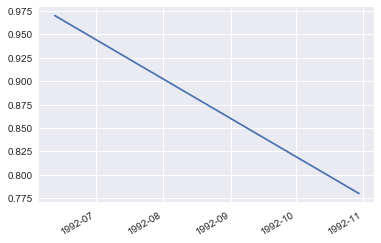

In [59]:
params['Accuracy'].plot()

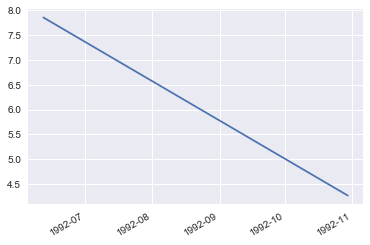

In [60]:
params['Sum of return'].plot()

In [61]:
features = pd.DataFrame([d['features'] for d in test_params], index=indexes, columns=feature_names)

In [62]:
features.idxmax(axis=1).value_counts()

Deviation EMA 40    2
dtype: int64

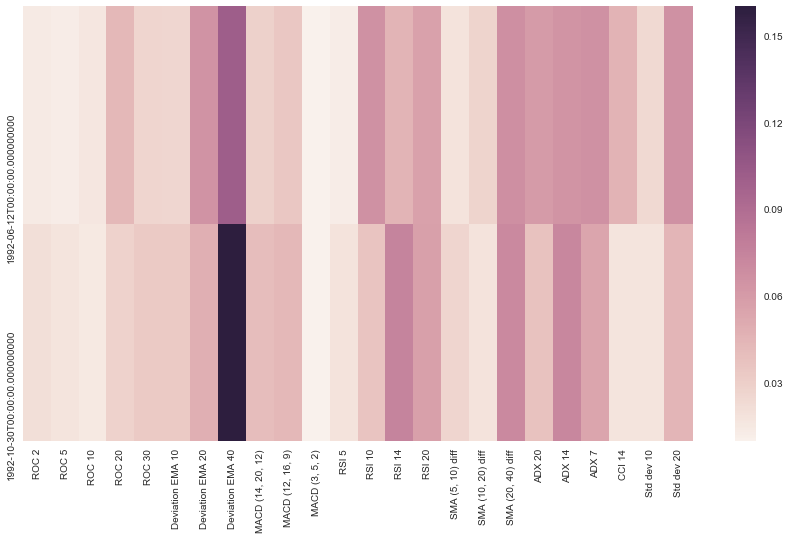

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(features)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


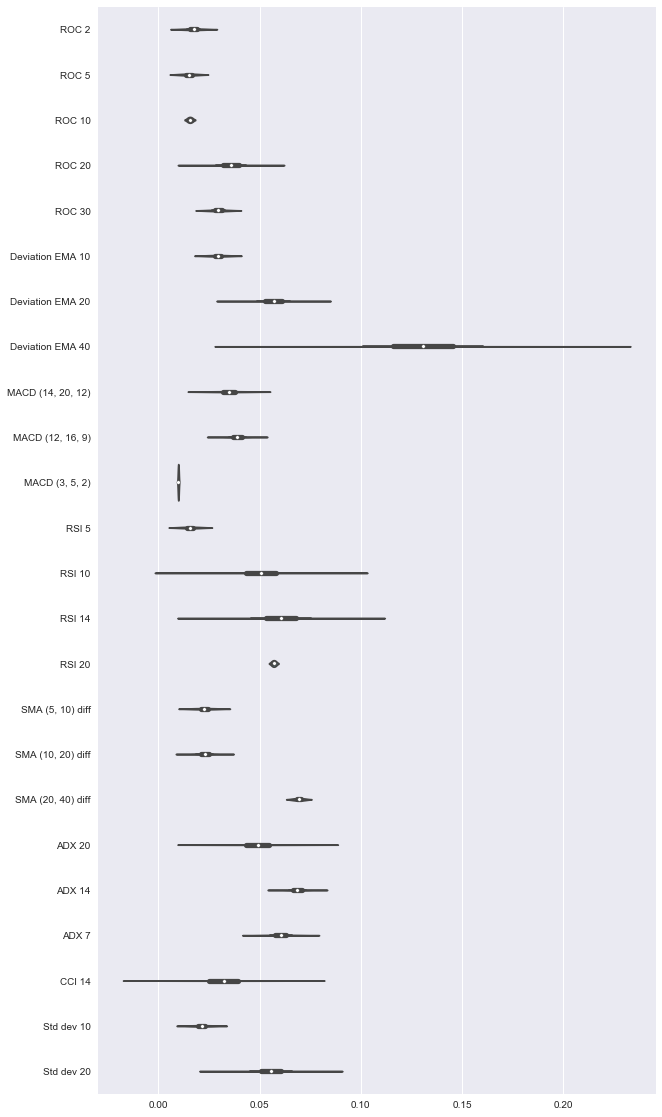

In [64]:
plt.figure(figsize=(10,20))
sns.violinplot(data=features, orient='h')